#Data Cleaning

In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing file from mydrive
job_postings_file = "/content/drive/MyDrive/datascience-808_group_project/data/job_postings.csv"

job_postings_df = pd.read_csv(job_postings_file)
pd.set_option('display.max_columns', None)

job_postings_df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,1.690000e+12,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,1.690000e+12,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,1.690000e+12,NaN,17.0,https://www.linkedin.com/jobs/view/133196985/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",NaN,1.690000e+12,NaN,NaN,https://www.linkedin.com/jobs/view/381055942/?...,NaN,ComplexOnsiteApply,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",NaN,1.690000e+12,NaN,2.0,https://www.linkedin.com/jobs/view/529257371/?...,NaN,ComplexOnsiteApply,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",NaN,1.690000e+12,NaN,1.0,https://www.linkedin.com/jobs/view/3701373516/...,https://aspirebakeriescareers.com/job/West-Col...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",2.0,1.690000e+12,NaN,7.0,https://www.linkedin.com/jobs/view/3701373522/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",NaN,1.690000e+12,NaN,3.0,https://www.linkedin.com/jobs/view/3701373523/...,https://recruiting.ultipro.com/HOL1005HNMC/Job...,OffsiteApply,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",NaN,1.690000e+12,NaN,10.0,https://www.linkedin.com/jobs/view/3701373524/...,https://opportunities.columbia.edu/jobs/mri-ma...,OffsiteApply,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [4]:
job_postings_df.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [5]:
job_postings_df.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored
count,1.588600e+04,1.552000e+04,5.521000e+03,981.000000,5521.000000,8700.000000,1.588600e+04,2340.0,13123.000000,1.588600e+04,9.280000e+02,1.588600e+04,15886.000000
mean,3.691293e+09,1.084100e+07,8.833622e+04,41167.664404,62352.218073,22.833103,1.690000e+12,1.0,76.776575,1.700765e+12,1.690000e+12,1.690000e+12,0.289248
std,1.028617e+08,2.313688e+07,9.068282e+04,93682.094905,59487.692283,54.892826,0.000000e+00,0.0,167.459105,2.709377e+09,0.000000e+00,0.000000e+00,0.453428
min,8.500877e+07,1.009000e+03,1.000000e+01,10.000000,10.000000,1.000000,1.690000e+12,1.0,1.000000,1.690000e+12,1.690000e+12,1.690000e+12,0.000000
25%,3.693071e+09,1.301100e+04,4.800000e+01,18.000000,38.000000,2.000000,1.690000e+12,1.0,6.000000,1.700000e+12,1.690000e+12,1.690000e+12,0.000000
50%,3.697358e+09,2.777685e+05,8.200000e+04,26.000000,60000.000000,6.000000,1.690000e+12,1.0,25.000000,1.700000e+12,1.690000e+12,1.690000e+12,0.000000
75%,3.699413e+09,7.798499e+06,1.400000e+05,52000.000000,99000.000000,21.000000,1.690000e+12,1.0,78.000000,1.700000e+12,1.690000e+12,1.690000e+12,1.000000
max,3.701374e+09,9.856222e+07,1.300000e+06,998426.000000,800000.000000,1615.000000,1.690000e+12,1.0,5656.000000,1.710000e+12,1.690000e+12,1.690000e+12,1.000000


In [6]:
# looking into null values
job_postings_df.isna().sum()

job_id                            0
company_id                      366
title                             0
description                       1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
dtype: int64

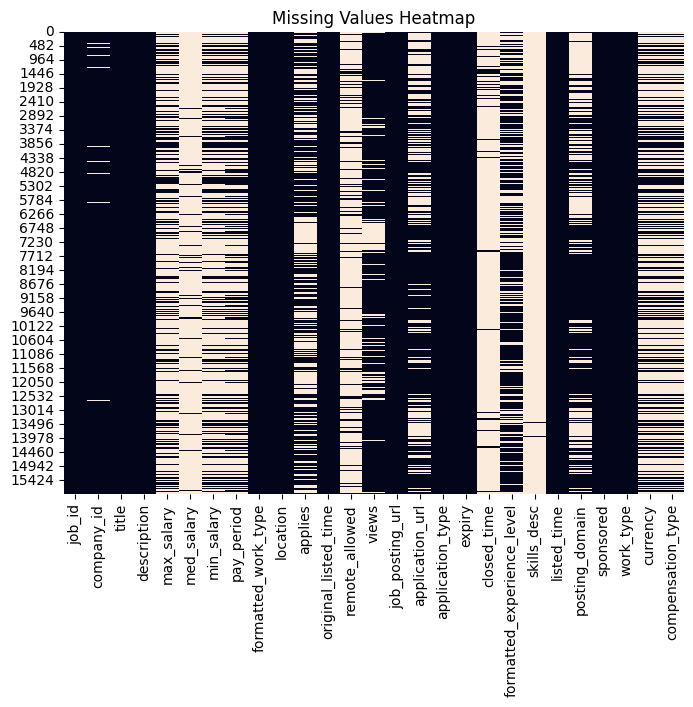

In [13]:
# heatmap for missing values
plt.figure(figsize=(8, 6))
sns.heatmap(job_postings_df.isna(), cbar=False)

plt.title('Missing Values Heatmap')
plt.show()

# Data Cleaning and Preprocessing

In [ ]:
# Removing rows with applies as Nan
job_postings_df=job_postings_df.dropna(subset='applies')

In [ ]:
#formatting timestamps
job_postings_df['original_listed_time'] = pd.to_datetime(job_postings_df['original_listed_time'], unit='ms')
job_postings_df['closed_time'] = pd.to_datetime(job_postings_df['closed_time'], unit='ms')
job_postings_df['listed_time'] = pd.to_datetime(job_postings_df['listed_time'], unit='ms')
job_postings_df['expiry'] = pd.to_datetime(job_postings_df['expiry'], unit='ms')


In [ ]:
#extracting states from location colum
job_postings_df['location_state']=job_postings_df['location'].str.split(',').str[1]
job_postings_df['location_state'].unique()

array([' NY', ' GA', nan, ' TX', ' NV', ' KY', ' FL', ' OH', ' CA', ' IL',
       ' VA', ' CO', ' WA', ' AZ', ' MD', ' HI', ' TN', ' United States',
       ' SC', ' NJ', ' DC', ' CT', ' MA', ' OK', ' NC', ' IA', ' AL',
       ' PA', ' IN', ' WI', ' KS', ' MN', ' NH', ' MI', ' VT', ' RI',
       ' DE', ' NE', ' UT', ' OR', ' NM', ' ME',
       ' Kansas Metropolitan Area', ' Texas Metropolitan Area', ' MO',
       ' California', ' WY', ' ID', ' MS', ' MT', ' LA', ' ND',
       ' Ohio Metropolitan Area', ' Oregon Metropolitan Area', ' WV',
       ' South Carolina Metropolitan Area', ' Nebraska Metropolitan Area',
       ' AR', ' Florida', ' New York Metropolitan Area',
       ' South Carolina Area', ' Wisconsin Metropolitan Area',
       ' North Carolina', ' Indiana Metropolitan Area', ' Indiana', ' AK',
       ' AZ Area', ' SD', ' Texas', ' South Carolina', ' Missouri Area',
       ' Alabama Area', ' Missouri', ' New York',
       ' Maine Metropolitan Area', ' Massachusetts Metropolitan 

In [ ]:
#mapping states name to their abbriviation
job_postings_df['location_state_1'] = job_postings_df['location_state'].apply({ ' NY': ' NY', ' TX': ' TX', ' GA': ' GA', ' MI':' MI',' NV':' NV',
                                                                               ' KY':' KY', ' FL':' FL',' ND':' ND',' AZ':' AZ',' VA':' VA',' MN':' MN',
                                                                                ' WA':' WA',' OH':' OH', ' IL':' IL',' PA':' PA',' CO':' CO',' MD':' MD',
                                                                                ' NJ':' NJ',' MO':' MO',' DC':' DC',' CT':' CT',' MA':' MA',' IN':' IN',
                                                                                ' ID':' ID',' AL':' AL',' OK':' OK',' NC':' NC',' WI':' WI',' KS':' KS',
                                                                                ' NH':' NH',' VT':' VT',' RI':' RI',' DE':' DE',' NE':' NE',' OR':' OR',
                                                                                ' LA':' LA',' AR':' AR', ' NM':' NM',' ME':' ME',' WY':' WY',' MS':' MS',
                                                                                ' MT':' MT',' WV':' WV',' SD':' SD',#' United States':' USA',
                                                                                ' AK':' AK',' HI':' HI',' TN':' TN',' SC':' SC',' IA':' IA',' UT':' UT',
                                                                          ' Missouri':' MO', ' Kansas Metropolitan Area':' KS',
                                                                           ' Texas Metropolitan Area':'TX',' California': ' CA', ' CA': ' CA',
                                                                           ' Ohio Metropolitan Area': ' OH',' Oregon Metropolitan Area': ' OR',
                                                                           ' South Carolina Metropolitan Area':' SC',' Nebraska Metropolitan Area':' NE',
                                                                           ' Florida':' FL',' New York Metropolitan Area':' NY',' South Carolina Area':' SC',
                                                                           ' Wisconsin Metropolitan Area':' WI',' North Carolina':' NC',' Indiana Metropolitan Area':' IN',
                                                                           ' Indiana':' IN',' AZ Area':' AZ',' Colorado':' CO',' New York':' NY',' AR Area':' AR',' Minnesota Area':' MN',
                                                                           ' Texas':' TX',' South Carolina':' SC',' Alabama Area':' AL',' Missouri Area':' MO',' Massachusetts': ' MA',
                                                                            ' Illinois Area':' IL',' Maine Metropolitan Area':' ME',' Massachusetts Metropolitan Area':' MA',' Hawaii':' HI'}.get)

In [ ]:
# some location had united states instead of state name after comma (delimter on which we did the split) and state name before comma. So, here we are extracting state name for those values
job_postings_df_US=job_postings_df[job_postings_df['location_state']==' United States']
job_postings_df_US['location_state']=job_postings_df['location'].str.split(',').str[0] # taking into account value before delimeter

In [ ]:
# checking unique values in the column
job_postings_df_US['location_state'].unique()

array(['New York', 'Texas', 'Arkansas', 'Virginia', 'Ohio', 'Florida',
       'Massachusetts', 'Kansas', 'California', 'Colorado', 'New Jersey',
       'Alabama', 'Arizona', 'Illinois', 'Missouri', 'Tennessee',
       'Georgia', 'Iowa', 'Utah', 'Rhode Island', 'Maine', 'Connecticut',
       'Maryland', 'North Carolina', 'Washington', 'Michigan',
       'Pennsylvania', 'Vermont', 'Oregon', 'South Carolina', 'Louisiana',
       'Kentucky', 'North Dakota', 'Minnesota', 'Alaska', 'Nevada',
       'Montana', 'South Dakota', 'Nebraska', 'Oklahoma', 'Mississippi',
       'District of Columbia', 'Delaware', 'Wisconsin', 'Wyoming',
       'New Mexico'], dtype=object)

In [ ]:
#mapping states name to their abbriviation
job_postings_df_US['location_state_1'] = job_postings_df_US['location_state'].apply({'New York':' NY', 'Texas':' TX', 'Arkansas':' AR', 'Virginia':' VA', 'Ohio':' OH', 'Florida':' FL',
                                                                                    'Massachusetts':' MA', 'Kansas':' KS', 'California':' CA', 'Colorado':' CO', 'New Jersey':' NJ',
                                                                                   'Alabama':' AL', 'Arizona':' AZ', 'Illinois':' IL', 'Missouri':' MO', 'Tennessee':' TN',
                                                                                  'Georgia':' GA', 'Iowa':' IA', 'Utah':' UT', 'Rhode Island':' RI', 'Maine': ' ME', 'Connecticut':' CT',
                                                                                  'Maryland':' MD', 'North Carolina':' NC', 'Washington':' WA', 'Michigan':' MI',
                                                                                  'Pennsylvania':' PA', 'Vermont':' VT', 'Oregon':' OR', 'South Carolina':' SC', 'Louisiana':' LA',
                                                                                  'Kentucky':' KY', 'North Dakota':' ND', 'Minnesota':' MN', 'Alaska':' AK', 'Nevada':' NV',
                                                                                  'Montana':' MT', 'South Dakota':' SD', 'Nebraska':' NE', 'Oklahoma':' OK', 'Mississippi':' MS',
                                                                                  'District of Columbia': ' DC', 'Delaware':' DE', 'Wisconsin':' WI', 'Wyoming':' WY','New Mexico':' NM'}.get)

In [ ]:
# Removing rows with location_state_1 as United states and NAN
job_postings_df=job_postings_df.dropna(subset='location_state')
job_postings_df=job_postings_df[job_postings_df['location_state']!=' United States']

In [ ]:
#merging both the dataset i.e. job_postings_df and job_postings_df_US
job_postings_df=job_postings_df.append(job_postings_df_US, ignore_index=True)

In [ ]:
job_postings_df.shape

(7341, 29)

<Axes: xlabel='med_salary', ylabel='Density'>

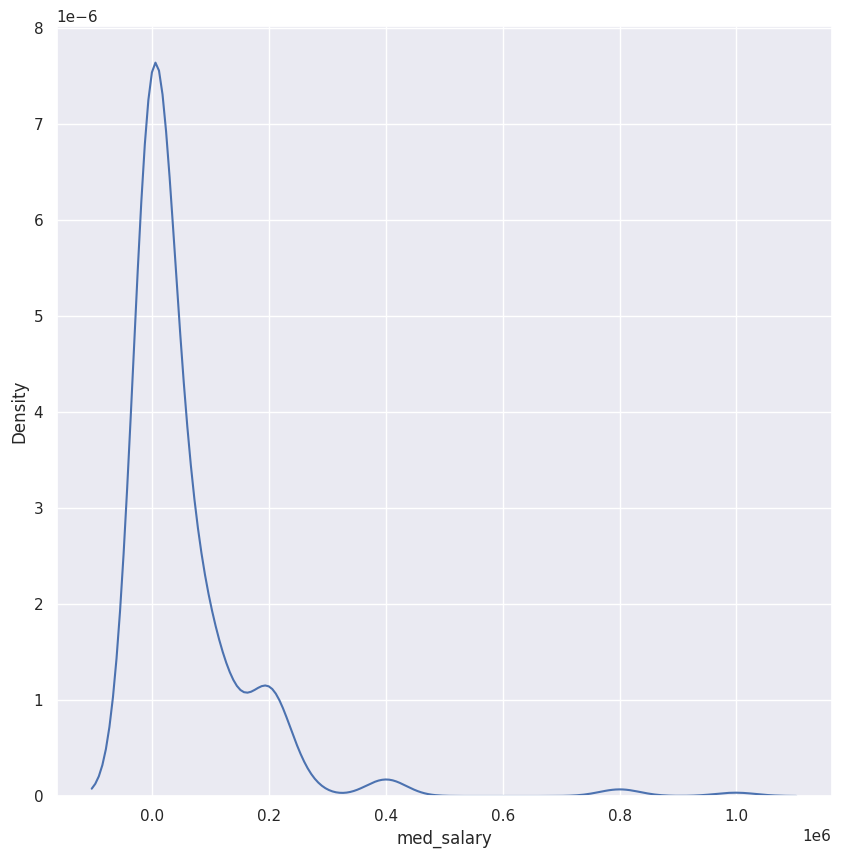

In [ ]:
# checking distribution of med_salary
import seaborn as sns
sns.kdeplot(data=job_postings_df,x='med_salary')

In [ ]:
job_postings_df['med_salary'] = job_postings_df['med_salary'].fillna(job_postings_df['med_salary'].median()) #replacing null values with median
job_postings_df['formatted_experience_level'] = job_postings_df['formatted_experience_level'].fillna("Unavailable") # replacing null values with Unavailable

In [ ]:
#converting sponsored value to boolean
job_postings_df['sponsored'] = job_postings_df['sponsored'].astype(bool)
job_postings_df.rename({'sponsored': 'isSponsored'}, axis=1, inplace=True)


# Company Data

In [ ]:
# importing company data
data="/content/drive/MyDrive/datascience-808_group_project/data/company_details/companies.csv"

company_df = pd.read_csv(data)
company_df

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [ ]:
#Join company data with main data to get company size
job_postings_df=job_postings_df.merge(company_df[['company_size','company_id']], on ='company_id', how = 'left')

# EDA

<Axes: xlabel='formatted_work_type', ylabel='count'>

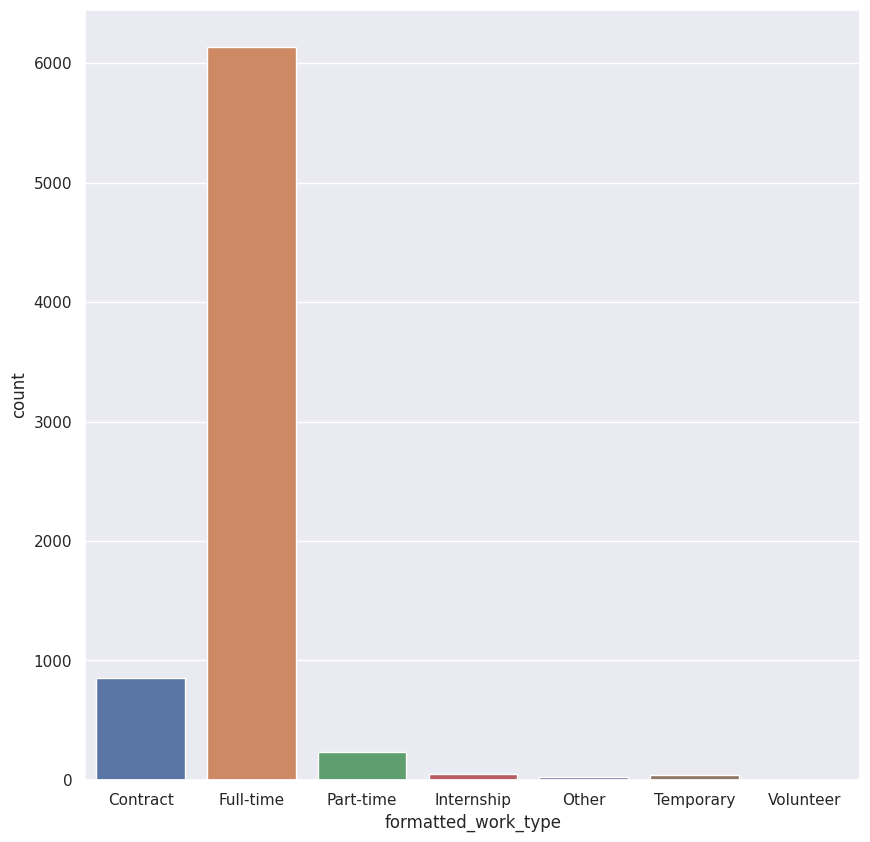

In [ ]:
# looking into distribution of jobs based on type of work type
sns.countplot(data=job_postings_df ,x='formatted_work_type')

<Axes: xlabel='formatted_work_type', ylabel='count'>

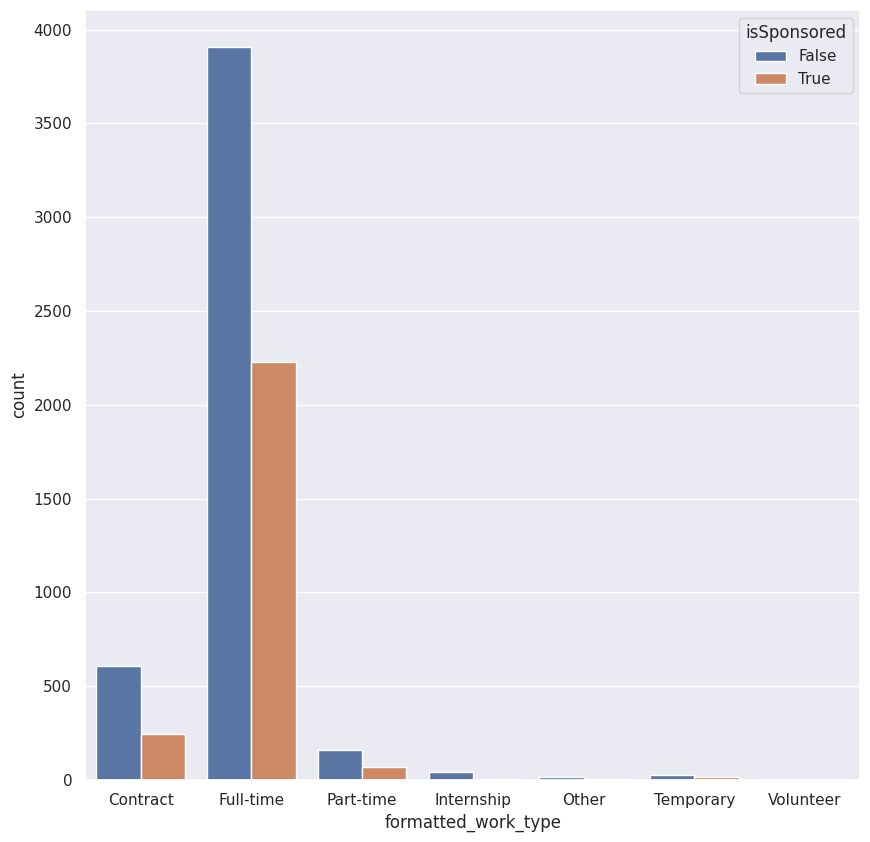

In [ ]:
# looking into distribution of jobs based on type of work type and sponsorship
sns.countplot(data=job_postings_df ,x='formatted_work_type', hue='isSponsored')

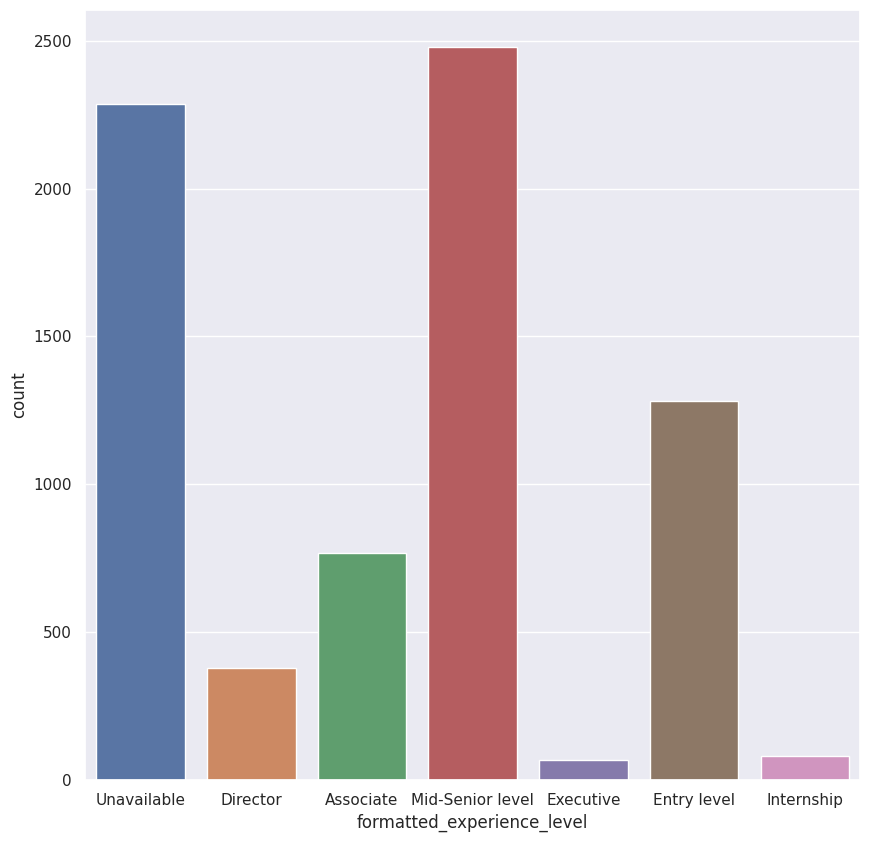

In [ ]:
# looking into distribution of jobs based on work experience
sns.countplot(data=job_postings_df ,x='formatted_experience_level')
sns.set(rc={'figure.figsize':(12,8)})

<Axes: xlabel='location_state', ylabel='count'>

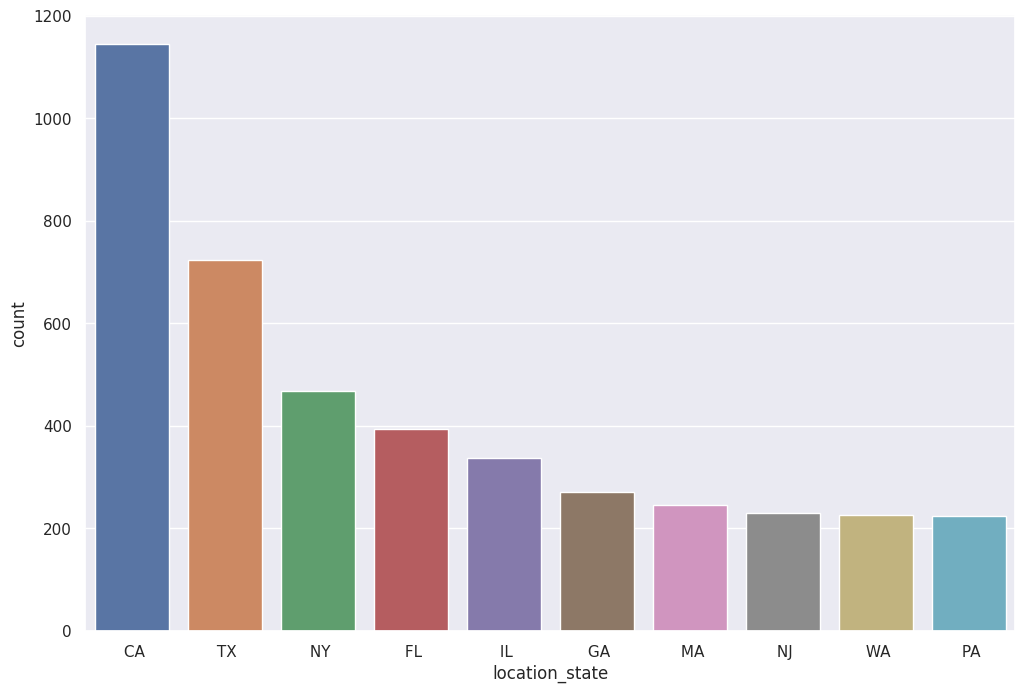

In [ ]:
# looking into distribution of jobs based on location
sns.countplot(data=job_postings_df ,x='location_state',order = job_postings_df.location_state.value_counts().iloc[:10].index)

<Axes: xlabel='location_state', ylabel='applies'>

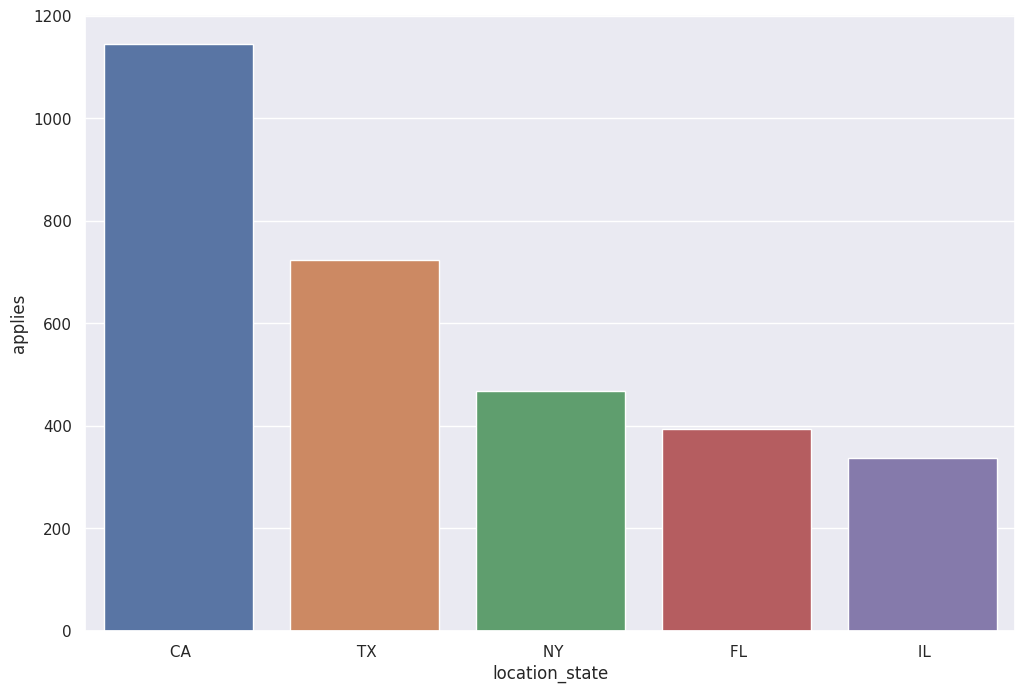

In [ ]:
# looking into distribution of applicants based on location
views_by_location=(job_postings_df.groupby('location_state')['applies'].agg('count').reset_index()).sort_values(by='applies',ascending=False)
sns.barplot(data=views_by_location.head(),x='location_state',y='applies')

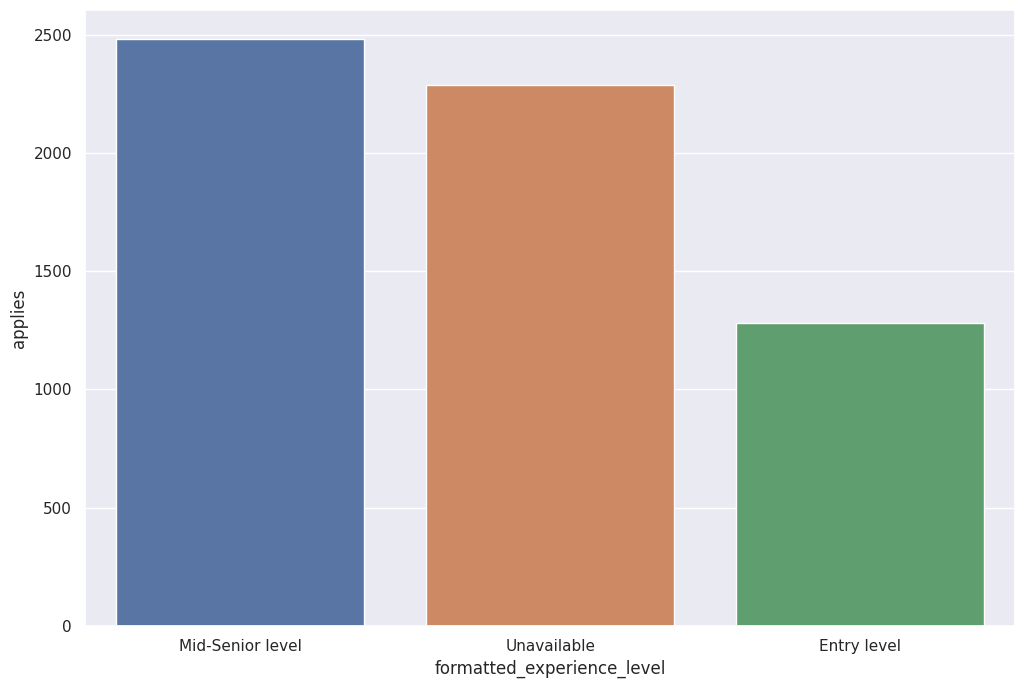

In [ ]:
# looking into distribution of applicants based on exoerience
applies_by_exp=(job_postings_df.groupby('formatted_experience_level')['applies'].agg('count').reset_index()).sort_values(by='applies',ascending=False)
sns.barplot(data=applies_by_exp.head(3),x='formatted_experience_level',y='applies')
sns.set(rc={'figure.figsize':(10,10)})

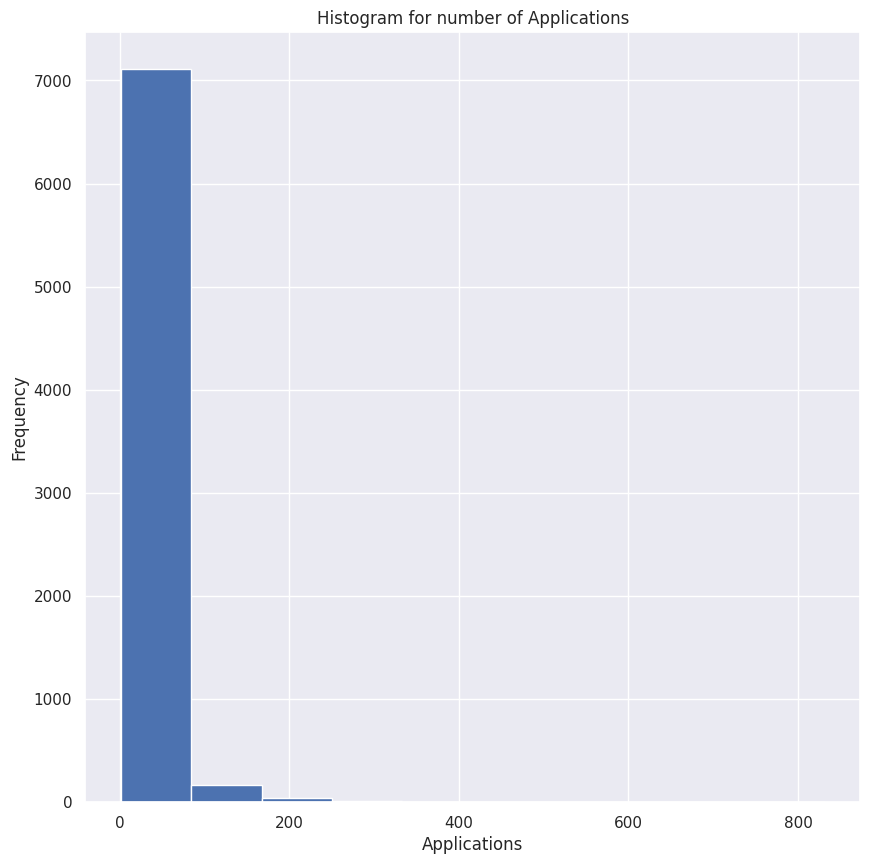

In [ ]:
# Histogram for number of Applications
plt.hist(job_postings_df['applies'])
plt.xlabel('Applications')
plt.ylabel('Frequency')
plt.title('Histogram for number of Applications')
plt.show()

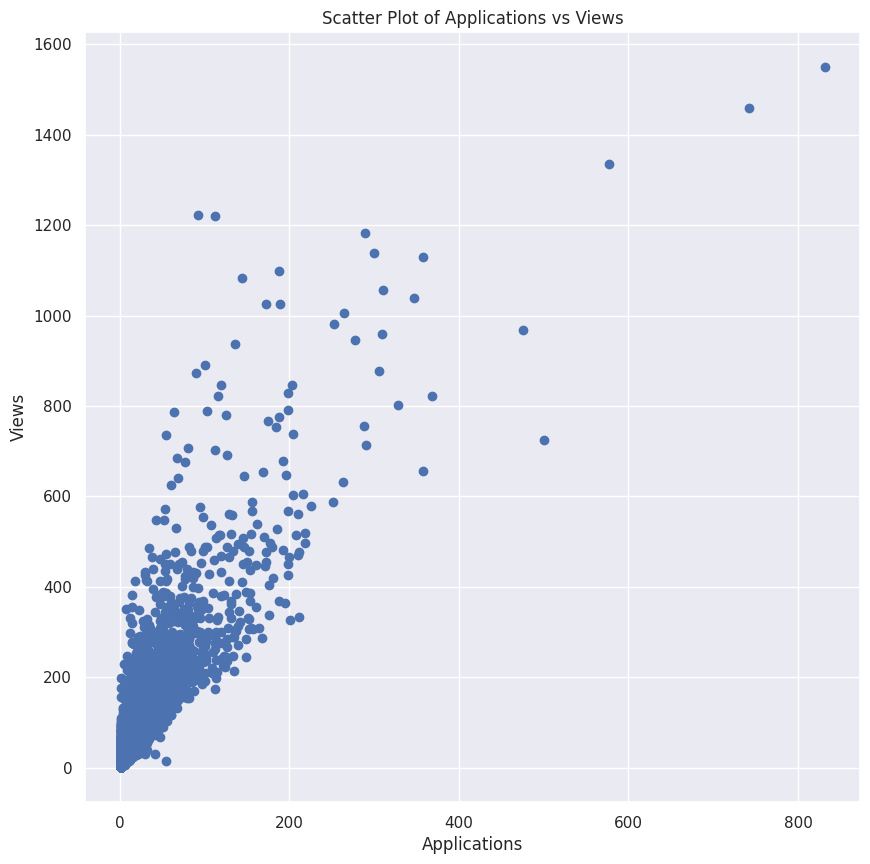

Correlation Coefficient: 0.8595354819356998


In [ ]:
# looking into correlation between views and applies

plt.scatter(job_postings_df['applies'], job_postings_df['views'])
plt.xlabel('Applications')
plt.ylabel('Views')
plt.title('Scatter Plot of Applications vs Views')
plt.show()

# Correlation coefficient
correlation_coefficient = job_postings_df['applies'].corr(job_postings_df['views'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Feature Engineering

In [ ]:
#removing irrelevant columns
jobs_data=job_postings_df.drop(columns=['company_id','closed_time','original_listed_time','location','location_state','application_url', 'job_posting_url', 'pay_period','currency','compensation_type','work_type','posting_domain','remote_allowed', 'skills_desc','max_salary','min_salary', 'job_id','title'])

In [ ]:
jobs_data.isna().sum()

description                     0
med_salary                      0
formatted_work_type             0
applies                         0
views                           0
application_type                0
expiry                          0
formatted_experience_level      0
listed_time                     0
isSponsored                     0
location_state_1                0
company_size                  513
dtype: int64

In [ ]:
jobs_data['list_time_mnth']=jobs_data['listed_time'].dt.month #extracting day from job posting date
jobs_data['list_time_day']=jobs_data['listed_time'].dt.day #extracting month from job posting date
jobs_data['duration_post_days']=((jobs_data['expiry']-jobs_data['listed_time'])/ np.timedelta64(1, 'D')).astype(int) # calculating job posting duration

In [ ]:
jobs_data['desc_len']=len(jobs_data['description']) # calculating description length

In [ ]:
#filling null company size values with 0
jobs_data['company_size'] = jobs_data['company_size'].fillna(0)

In [ ]:
# dropping irrelavent columns
jobs_data.drop(columns=['description','listed_time','expiry'],inplace=True)

In [ ]:
jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7341 entries, 0 to 7340
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   med_salary                  7341 non-null   float64
 1   formatted_work_type         7341 non-null   object 
 2   applies                     7341 non-null   float64
 3   views                       7341 non-null   float64
 4   application_type            7341 non-null   object 
 5   formatted_experience_level  7341 non-null   object 
 6   isSponsored                 7341 non-null   bool   
 7   location_state_1            7341 non-null   object 
 8   company_size                7341 non-null   float64
 9   list_time_mnth              7341 non-null   int64  
 10  list_time_day               7341 non-null   int64  
 11  duration_post_days          7341 non-null   int64  
 12  desc_len                    7341 non-null   int64  
dtypes: bool(1), float64(4), int64(4),

In [ ]:
# one hot encoding
jobs_data = pd.get_dummies(jobs_data, columns = ['application_type','isSponsored','formatted_experience_level','location_state_1','formatted_work_type'])

# Model training

In [ ]:
# features
X=jobs_data.drop(columns=['applies'])

In [ ]:
# Target Variable
Y=jobs_data[['applies']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
# all the models on which we are testing
modelClassifiers = \
    {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=0.5),
    'Lasso': Lasso(alpha=0.5),
    'EN': ElasticNet(alpha=0.5, l1_ratio=0.5),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

In [ ]:
metrics_df = pd.DataFrame(columns = ['Model', 'Features','MSE', 'MAE','R2','RMSE'])

def createMetrics(metrics_df, model, features, y_pred, y_true): # function calculating the metrics
    mse = mean_squared_error(y_true, y_pred)

    mae = mean_absolute_error(y_true, y_pred)

    r_squared = r2_score(y_true, y_pred)

    rmse = np.sqrt(mse)

    metrics_df = metrics_df.append({'Model' : model, 'Features' : features, 'MSE' : mse, 'MAE': mae, 'R2': r_squared, 'RMSE' : rmse},
                ignore_index = True)

    return metrics_df


In [ ]:
# training data on all the defined models and predicting the output for the test data
for cmodel, clf in modelClassifiers.items():
        print(cmodel)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics_df = createMetrics(metrics_df, cmodel, X_train.columns, predictions, y_test)

Linear
Ridge
Lasso
EN
DecisionTree
RandomForest
GradientBoosting
XGBoost
SVR
KNN


In [ ]:
metrics_df

,Model,Features,MSE,MAE,R2,RMSE
0,Linear,"Index(['med_salary', 'views', 'company_size', ...",217.538646,8.015197,0.781761,14.749191
1,Ridge,"Index(['med_salary', 'views', 'company_size', ...",217.506820,8.011127,0.781793,14.748112
2,Lasso,"Index(['med_salary', 'views', 'company_size', ...",219.238073,7.635013,0.780056,14.806690
3,EN,"Index(['med_salary', 'views', 'company_size', ...",219.757286,7.566702,0.779535,14.824213
4,DecisionTree,"Index(['med_salary', 'views', 'company_size', ...",371.065904,7.974946,0.627740,19.263071
5,RandomForest,"Index(['med_salary', 'views', 'company_size', ...",209.814796,6.175170,0.789510,14.484985
6,GradientBoosting,"Index(['med_salary', 'views', 'company_size', ...",244.585520,6.201215,0.754627,15.639230
7,XGBoost,"Index(['med_salary', 'views', 'company_size', ...",239.401097,6.414255,0.759828,15.472592
8,SVR,"Index(['med_salary', 'views', 'company_size', ...",1093.875653,13.097237,-0.097396,33.073791
9,KNN,"Index(['med_salary', 'views', 'company_size', ...",250.276558,6.918301,0.748918,15.820131


# Hyperparameter tuning

In [ ]:
parameters={
            'n_estimators' : [100,300, 500, 700, 1000,1200,1500, 2100],
            'max_depth' : [ 9, 11, 13, 15,18,19],                             # definging hyperparameters on which we are tuning
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }

clf= RandomForestRegressor()
random_search = RandomizedSearchCV(clf, parameters,cv=5)                     # RandomGridSearchCV algo
random_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [9, 11, 13, 15, 18, 19],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000, 1200, 1500,
                                                         2100]})

In [ ]:
# best parameters yielded by the algorithm
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 13}

In [ ]:
# trainging the classifier with the resulting hyperparameters
clf=RandomForestRegressor(n_estimators=100,min_samples_split=2,max_features='auto',max_depth=13)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions))

<ipython-input-133-6ca291bedcbf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


14.26752178379671

In [ ]:
clf.score(X_test, y_test)

0.7907059927822032

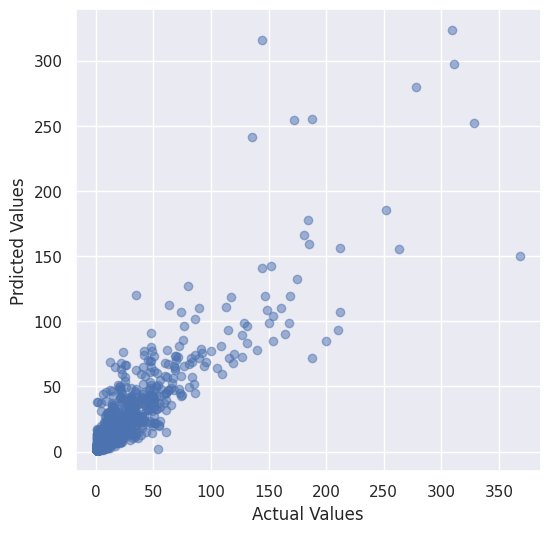

In [ ]:
# plotting scatter plot between actual and predicted values
plt.figure(figsize = (6,6))
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("Actual Values")
plt.ylabel("Prdicted Values")
plt.show()
